# 0.환경설정

In [ ]:
# !pip install matplotlib

In [ ]:
# # 필요한 라이브러리를 설치합니다.
# !pip install timm

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd
import os

In [3]:
# 구글 드라이브 마운트, Colab을 이용하지 않는다면 패스해도 됩니다.
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


In [ ]:
# # 구글 드라이브에 업로드된 대회 데이터를 압축 해제하고 로컬에 저장합니다.
# !tar -xvf '/content/drive/MyDrive/AI Lab/CV 대회/data.tar.gz' -C '/content/drive/MyDrive/AI Lab/CV 대회/'

# 1.EDA 자동화 (텍스트 데이터)

## Pandas Profiling - 메타데이터 EDA

In [ ]:
# !pip install ydata-profiling

In [ ]:
# import pandas as pd
# from ydata_profiling import ProfileReport

# # train.csv 파일을 읽어옵니다.
# # train_df = pd.read_csv('/content/drive/MyDrive/AI Lab/CV 대회/data/train.csv')
# train_df = pd.read_csv('/content/drive/MyDrive/AI Lab/CV 대회/data/meta.csv')

# # 데이터 프레임에 대한 프로파일링 보고서 생성
# profile = ProfileReport(train_df, title="Train Data Profiling Report", explorative=True)

# # 프로파일링 보고서 보기
# profile.to_notebook_iframe()


## Dataprep.eda

In [ ]:
# !pip install dataprep

In [ ]:
# from dataprep.eda import create_report
# import pandas as pd

# # 데이터 불러오기
# df = pd.read_csv('/content/drive/MyDrive/AI Lab/CV 대회/data/meta.csv')

# # 보고서 생성
# create_report(df)

# 2.훈련 데이터 시각화

클래스별 이미지의 분포

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attempt to load the CSV files with a different encoding
train_df = pd.read_csv('/content/drive/MyDrive/AI Lab/CV 대회/data/train.csv', encoding='latin1')
meta_df = pd.read_csv('/content/drive/MyDrive/AI Lab/CV 대회/data/meta.csv', encoding='latin1')

# Display the first few rows of the dataframes to understand their structure
train_df.head(), meta_df.head()

(                     ID  target
 0  002f99746285dfdd.jpg      16
 1  008ccd231e1fea5d.jpg      10
 2  008f5911bfda7695.jpg      10
 3  009235e4c9c07af5.jpg       4
 4  00b2f44967580c74.jpg      16,
    target                                         class_name
 0       0                                     account_number
 1       1  application_for_payment_of_pregnancy_medical_e...
 2       2                                      car_dashboard
 3       3            confirmation_of_admission_and_discharge
 4       4                                          diagnosis)

In [5]:
# train 파일과 meta 파일을 target 기준으로 조인
merged_df = pd.merge(train_df, meta_df, on='target', how='left')

# 결과 확인
print(merged_df.head())

                     ID  target                  class_name
0  002f99746285dfdd.jpg      16  vehicle_registration_plate
1  008ccd231e1fea5d.jpg      10        payment_confirmation
2  008f5911bfda7695.jpg      10        payment_confirmation
3  009235e4c9c07af5.jpg       4                   diagnosis
4  00b2f44967580c74.jpg      16  vehicle_registration_plate


<ipython-input-7-43a8a8556e5c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


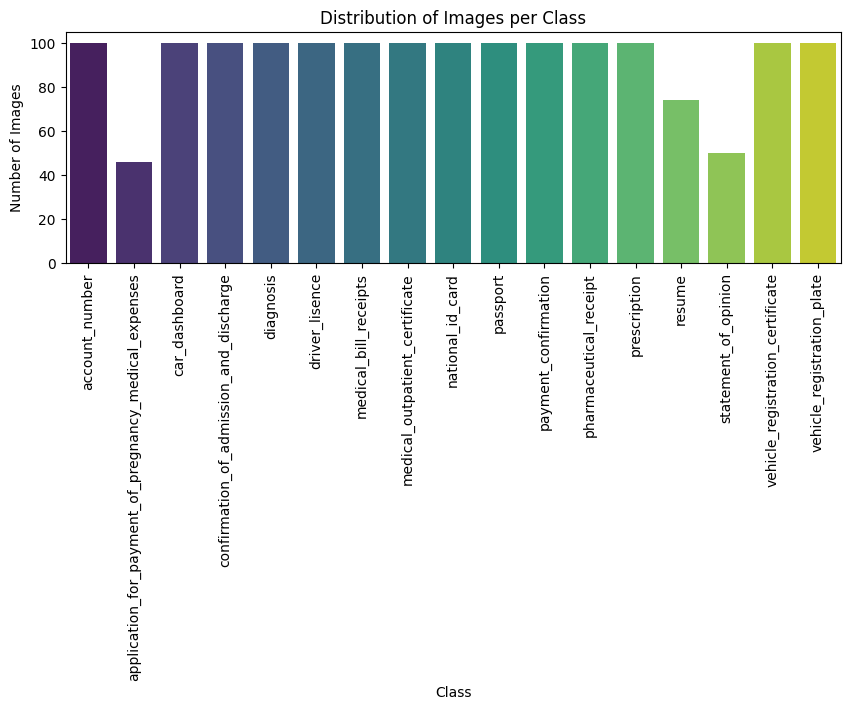

In [7]:
# 클래스별 이미지 수 계산
class_distribution = merged_df['class_name'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 3))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=90)  # X축 레이블을 90도 회전
plt.show()


In [8]:
class_distribution

class_name
account_number                                           100
application_for_payment_of_pregnancy_medical_expenses     46
car_dashboard                                            100
confirmation_of_admission_and_discharge                  100
diagnosis                                                100
driver_lisence                                           100
medical_bill_receipts                                    100
medical_outpatient_certificate                           100
national_id_card                                         100
passport                                                 100
payment_confirmation                                     100
pharmaceutical_receipt                                   100
prescription                                             100
resume                                                    74
statement_of_opinion                                      50
vehicle_registration_certificate                         100
vehicle_regis

## a.Train data 샘플 시각화

각 클래스에서 몇 개의 샘플 이미지를 시각적으로 확인하여 데이터를 이해

In [10]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import os

# 각 클래스에서 샘플 이미지를 3개씩 표시
def plot_sample_images(train_df, class_names, num_samples=5, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    num_classes = train_df['target'].nunique()
    plt.figure(figsize=(20, num_classes * 5))

    for i in range(num_classes):
        class_samples = train_df[train_df['target'] == i].sample(num_samples)
        for j, (index, row) in enumerate(class_samples.iterrows()):
            img_path = os.path.join(folder, row['ID'])
            img = mpimg.imread(img_path)

            plt.subplot(num_classes, num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            if j == 0:
                plt.ylabel(f"Class: {class_names[i]}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 샘플 이미지 표시
plot_sample_images(train_df, class_names_dict)


Output hidden; open in https://colab.research.google.com to view.

In [34]:


def plot_class_images(train_df, class_label, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 해당 클래스의 전체 샘플 가져오기
    class_samples = train_df[train_df['target'] == class_label]
    num_samples = class_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 0번 클래스 전체 이미지 표시
plot_class_images(train_df, 0, class_names_dict[0])


Output hidden; open in https://colab.research.google.com to view.

### 1.application_for_payment_of_pregnancy_medical_expenses 시각화

In [18]:
def plot_class_1_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 1번 클래스의 전체 샘플 가져오기
    class_1_samples = train_df[train_df['target'] == 1]
    num_samples = class_1_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_1_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 1번 클래스 전체 이미지 표시
plot_class_1_images(train_df, class_names_dict[1])

Output hidden; open in https://colab.research.google.com to view.

### 2.car_dashboard

In [19]:

def plot_class_2_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 2번 클래스의 전체 샘플 가져오기
    class_2_samples = train_df[train_df['target'] == 2]
    num_samples = class_2_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_2_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 2번 클래스 전체 이미지 표시
plot_class_2_images(train_df, class_names_dict[2])


Output hidden; open in https://colab.research.google.com to view.

### 3.confirmation_of_admission_and_discharge

In [20]:


def plot_class_3_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 3번 클래스의 전체 샘플 가져오기
    class_3_samples = train_df[train_df['target'] == 3]
    num_samples = class_3_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_3_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 3번 클래스 전체 이미지 표시
plot_class_3_images(train_df, class_names_dict[3])


Output hidden; open in https://colab.research.google.com to view.

### 4.diagnosis

In [21]:


def plot_class_4_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 4번 클래스의 전체 샘플 가져오기
    class_4_samples = train_df[train_df['target'] == 4]
    num_samples = class_4_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_4_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 4번 클래스 전체 이미지 표시
plot_class_4_images(train_df, class_names_dict[4])


Output hidden; open in https://colab.research.google.com to view.

### 5.driver_lisence

In [22]:


def plot_class_5_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 5번 클래스의 전체 샘플 가져오기
    class_5_samples = train_df[train_df['target'] == 5]
    num_samples = class_5_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_5_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 5번 클래스 전체 이미지 표시
plot_class_5_images(train_df, class_names_dict[5])


Output hidden; open in https://colab.research.google.com to view.

### 6.medical_bill_receipts

In [23]:

def plot_class_images(train_df, class_name, class_target, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 특정 클래스의 전체 샘플 가져오기
    class_samples = train_df[train_df['target'] == class_target]
    num_samples = class_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 6번 클래스 전체 이미지 표시
plot_class_images(train_df, class_names_dict[6], 6)


Output hidden; open in https://colab.research.google.com to view.

### 7.medical_outpatient_certificate

In [24]:


def plot_class_images(train_df, class_name, class_id, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 주어진 클래스의 전체 샘플 가져오기
    class_samples = train_df[train_df['target'] == class_id]
    num_samples = class_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 7번 클래스 전체 이미지 표시
plot_class_images(train_df, class_names_dict[7], 7)


Output hidden; open in https://colab.research.google.com to view.

### 8.national_id_card

In [25]:


def plot_class_8_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 8번 클래스의 전체 샘플 가져오기
    class_8_samples = train_df[train_df['target'] == 8]
    num_samples = class_8_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_8_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 8번 클래스 전체 이미지 표시
plot_class_8_images(train_df, class_names_dict[8])


Output hidden; open in https://colab.research.google.com to view.

### 9.passport

In [26]:


def plot_class_9_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 9번 클래스의 전체 샘플 가져오기
    class_9_samples = train_df[train_df['target'] == 9]
    num_samples = class_9_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_9_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 9번 클래스 전체 이미지 표시
plot_class_9_images(train_df, class_names_dict[9])


Output hidden; open in https://colab.research.google.com to view.

### 10.payment_confirmation

In [27]:


def plot_class_10_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 10번 클래스의 전체 샘플 가져오기
    class_10_samples = train_df[train_df['target'] == 10]
    num_samples = class_10_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_10_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 10번 클래스 전체 이미지 표시
plot_class_10_images(train_df, class_names_dict[10])


Output hidden; open in https://colab.research.google.com to view.

### 11.pharmaceutical_receipt

In [28]:


def plot_class_images(train_df, class_name, class_number, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 주어진 클래스의 전체 샘플 가져오기
    class_samples = train_df[train_df['target'] == class_number]
    num_samples = class_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 11번 클래스 전체 이미지 표시
plot_class_images(train_df, class_names_dict[11], 11)


Output hidden; open in https://colab.research.google.com to view.

### 12.prescription

In [29]:


def plot_class_images(train_df, class_name, class_number=12, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 지정된 클래스의 전체 샘플 가져오기
    class_samples = train_df[train_df['target'] == class_number]
    num_samples = class_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 12번 클래스 전체 이미지 표시
plot_class_images(train_df, class_names_dict[12], class_number=12)


Output hidden; open in https://colab.research.google.com to view.

### 13.resume

In [30]:


def plot_class_images(train_df, class_name, target_class=13, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 특정 클래스의 전체 샘플 가져오기
    class_samples = train_df[train_df['target'] == target_class]
    num_samples = class_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 13번 클래스 전체 이미지 표시
plot_class_images(train_df, class_names_dict[13], target_class=13)


Output hidden; open in https://colab.research.google.com to view.

### 14.statement_of_opinion

In [31]:


def plot_class_images(train_df, class_name, class_id, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 해당 클래스의 전체 샘플 가져오기
    class_samples = train_df[train_df['target'] == class_id]
    num_samples = class_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 14번 클래스 전체 이미지 표시
plot_class_images(train_df, class_names_dict[14], 14)


Output hidden; open in https://colab.research.google.com to view.

### 15.vehicle_registration_certificate

In [32]:


def plot_class_images(train_df, class_name, target_class=15, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # target_class의 전체 샘플 가져오기
    class_samples = train_df[train_df['target'] == target_class]
    num_samples = class_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 15번 클래스 전체 이미지 표시
plot_class_images(train_df, class_names_dict[15], target_class=15)


Output hidden; open in https://colab.research.google.com to view.

### 16.vehicle_registration_plate

In [33]:

def plot_class_16_images(train_df, class_name, folder='/content/drive/MyDrive/AI Lab/CV 대회/data/train'):
    # 16번 클래스의 전체 샘플 가져오기
    class_16_samples = train_df[train_df['target'] == 16]
    num_samples = class_16_samples.shape[0]

    # 그리드 크기 계산
    rows = (num_samples // 5) + (1 if num_samples % 5 != 0 else 0)

    plt.figure(figsize=(20, rows * 4))  # 전체 그래프 크기 설정

    for i, (index, row) in enumerate(class_16_samples.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(rows, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)  # 서브플롯 간 여백 최소화
    plt.suptitle(f"Class: {class_name}", fontsize=16, y=0.9)
    plt.show()

# 클래스 이름을 딕셔너리로 변환
class_names_dict = meta_df.set_index('target')['class_name'].to_dict()

# 16번 클래스 전체 이미지 표시
plot_class_16_images(train_df, class_names_dict[16])


Output hidden; open in https://colab.research.google.com to view.

## b. 이미지 크기 및 비율 분석

이미지 크기와 비율의 분포를 확인하여 이상치나 불일치를 식별

In [ ]:
# 이미지 크기를 얻는 함수
def get_image_sizes(df, image_dir, id_col='ID'):
    sizes = []
    for image_id in df[id_col]:
        img_path = os.path.join(image_dir, image_id)
        with Image.open(img_path) as img:
            sizes.append(img.size)
    return sizes

In [ ]:
# 이미지 디렉토리 경로 설정
image_dir = '/content/drive/MyDrive/AI Lab/CV 대회/data/train'  # 실제 이미지가 저장된 디렉토리로 변경 필요

# 이미지 크기 얻기
image_sizes = get_image_sizes(merged_df, image_dir)

# 분석을 위한 DataFrame으로 변환
size_df = pd.DataFrame(image_sizes, columns=['width', 'height'])
size_df['class'] = merged_df['class_name']

<Figure size 1400x800 with 0 Axes>

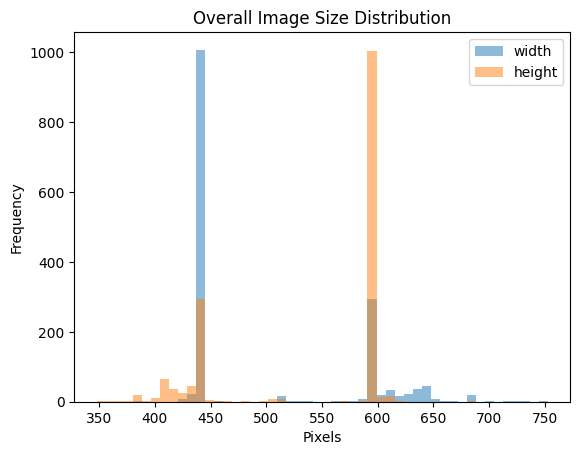

In [ ]:
# 크기 분포 플롯
plt.figure(figsize=(14, 8))
size_df.plot(kind='hist', y=['width', 'height'], bins=50, alpha=0.5, title='Image Size Distribution')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Overall Image Size Distribution')
plt.show()

<Figure size 2000x800 with 0 Axes>

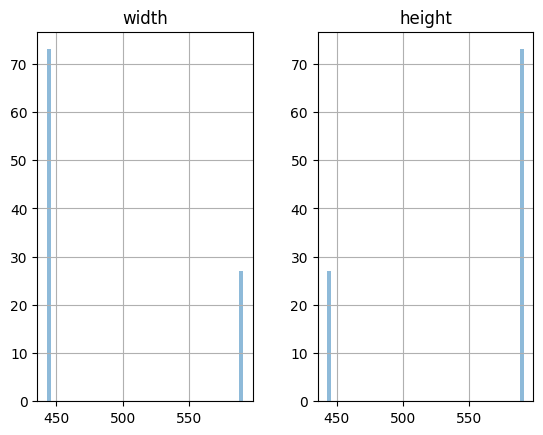

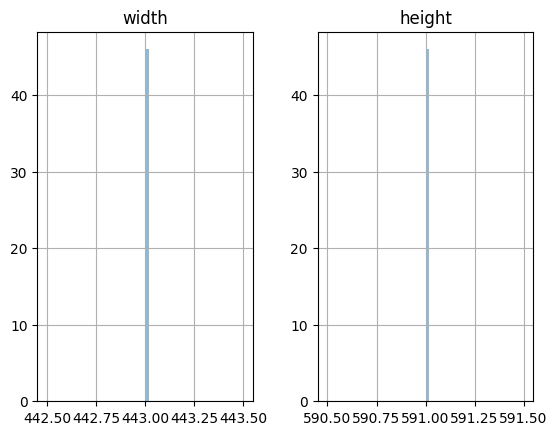

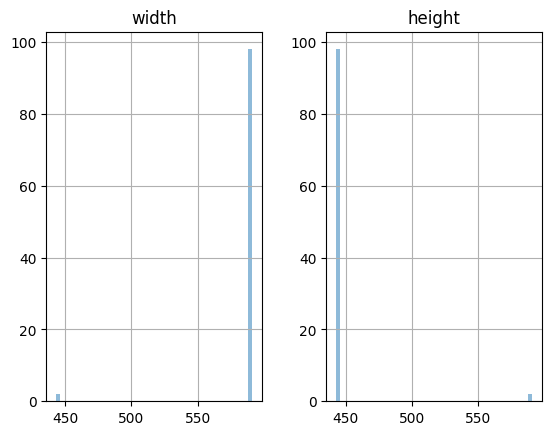

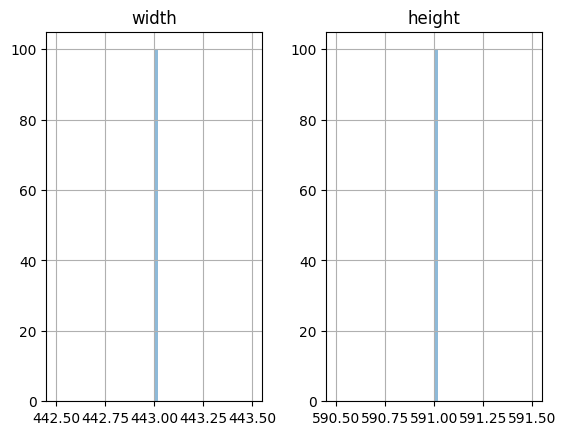

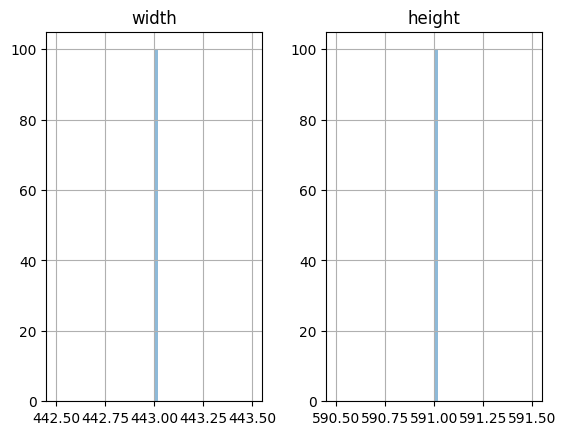

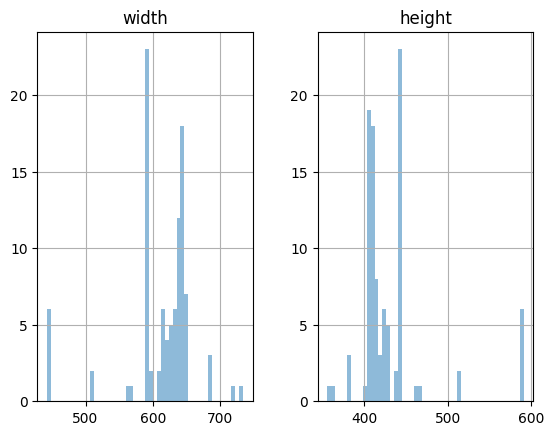

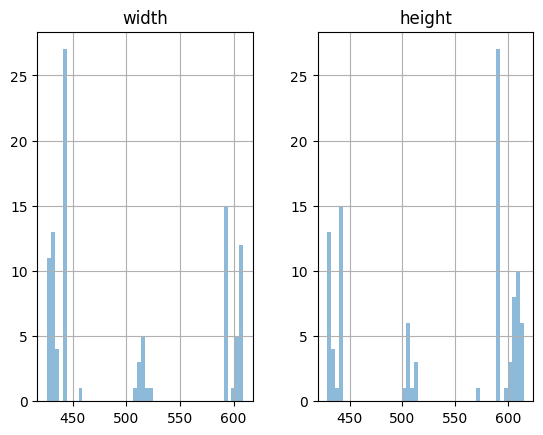

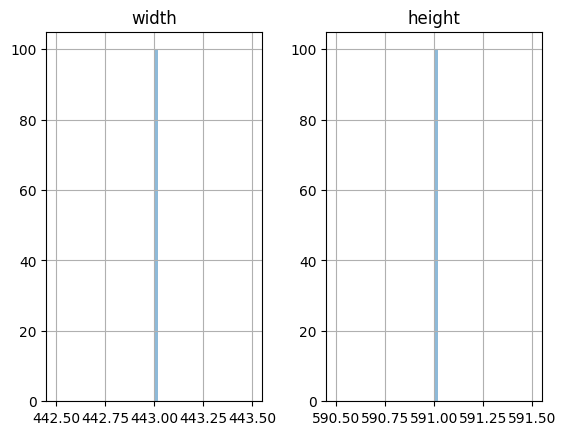

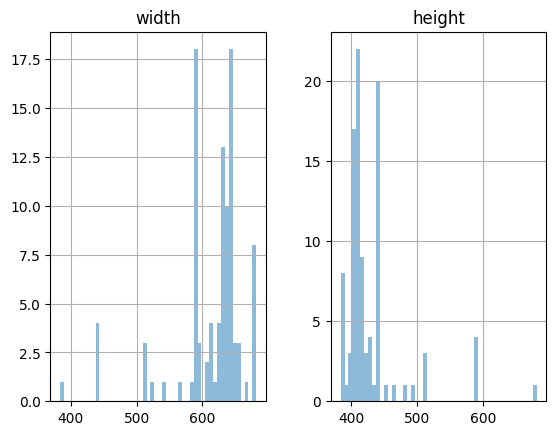

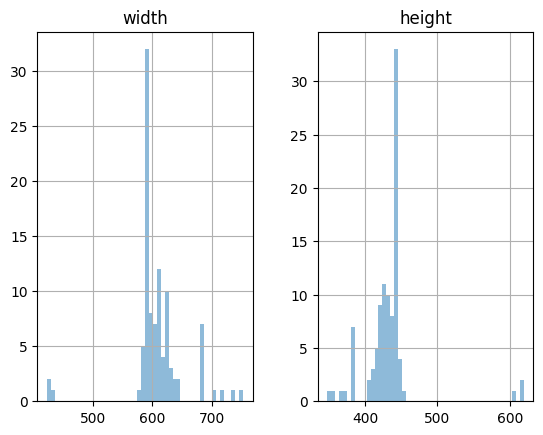

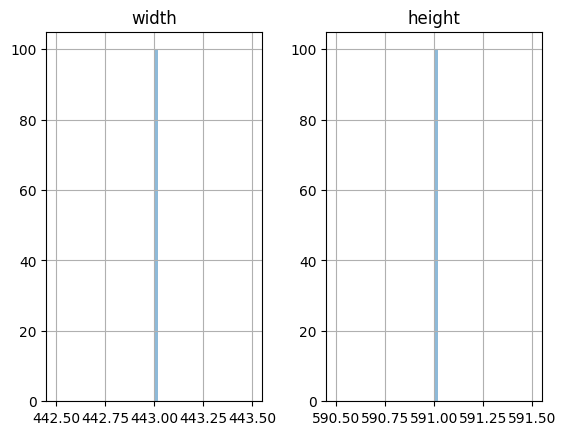

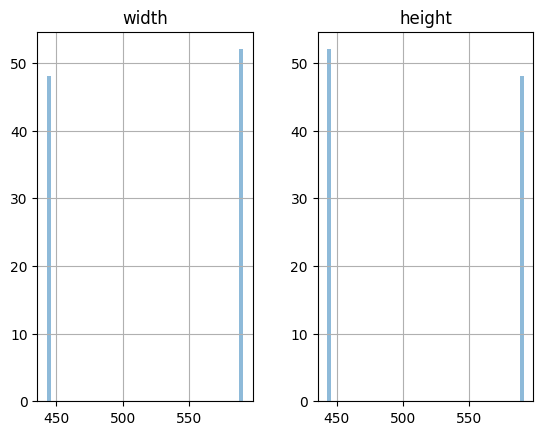

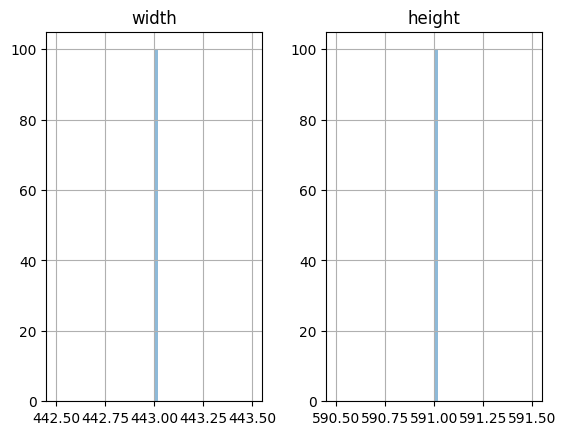

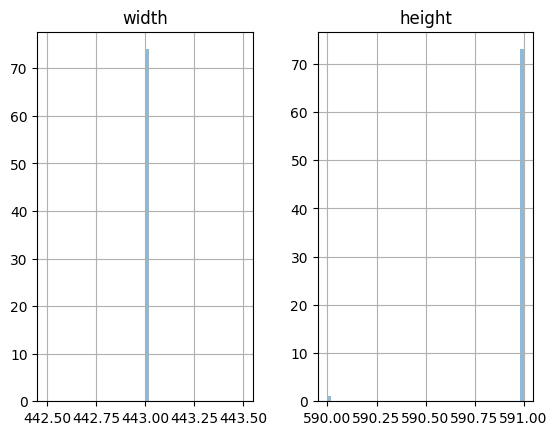

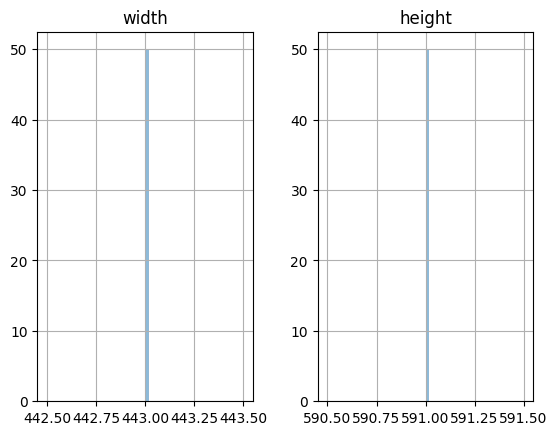

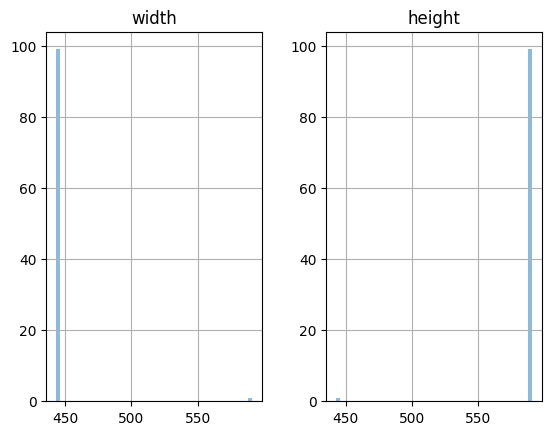

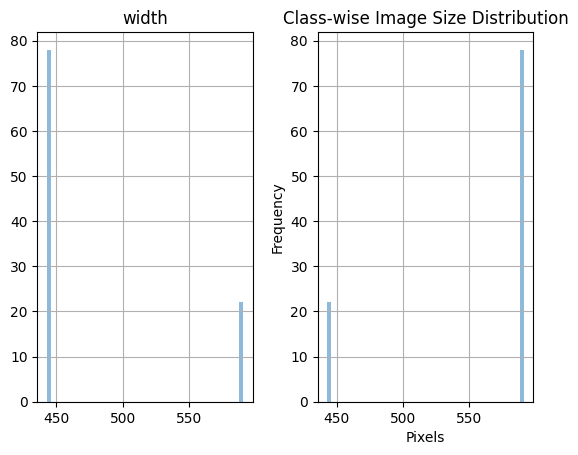

In [ ]:
# 클래스별 이미지 크기의 평균 계산
class_size_means = size_df.groupby('class').mean()

# 클래스별 이미지 크기 분포 플롯
plt.figure(figsize=(20, 8))
size_df.groupby('class').hist(bins=50, alpha=0.5)
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Class-wise Image Size Distribution')
plt.show()

In [ ]:
# 클래스별 이미지 크기의 평균 출력
print(class_size_means)

                                                     width      height
class                                                                 
account_number                                      482.96  551.030000
application_for_payment_of_pregnancy_medical_ex...  443.00  591.000000
car_dashboard                                       588.04  445.960000
confirmation_of_admission_and_discharge             443.00  591.000000
diagnosis                                           443.00  591.000000
driver_lisence                                      611.81  431.690000
medical_bill_receipts                               499.21  535.380000
medical_outpatient_certificate                      443.00  591.000000
national_id_card                                    613.43  430.960000
passport                                            608.98  432.560000
payment_confirmation                                443.00  591.000000
pharmaceutical_receipt                              519.96  514.040000
prescr

<Figure size 1400x800 with 0 Axes>

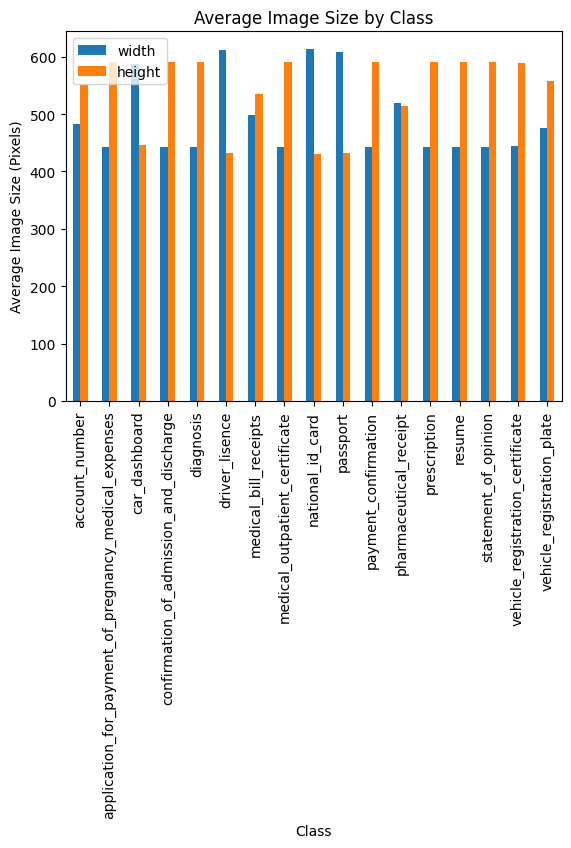

In [ ]:
# 클래스별 이미지 크기 평균을 하나의 그래프로 시각화
plt.figure(figsize=(14, 8))
class_size_means.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Average Image Size (Pixels)')
plt.title('Average Image Size by Class')
plt.xticks(rotation=90)
plt.show()

# 3.테스트 데이터 시각화

## a. 테스트 데이터 샘플 시각화

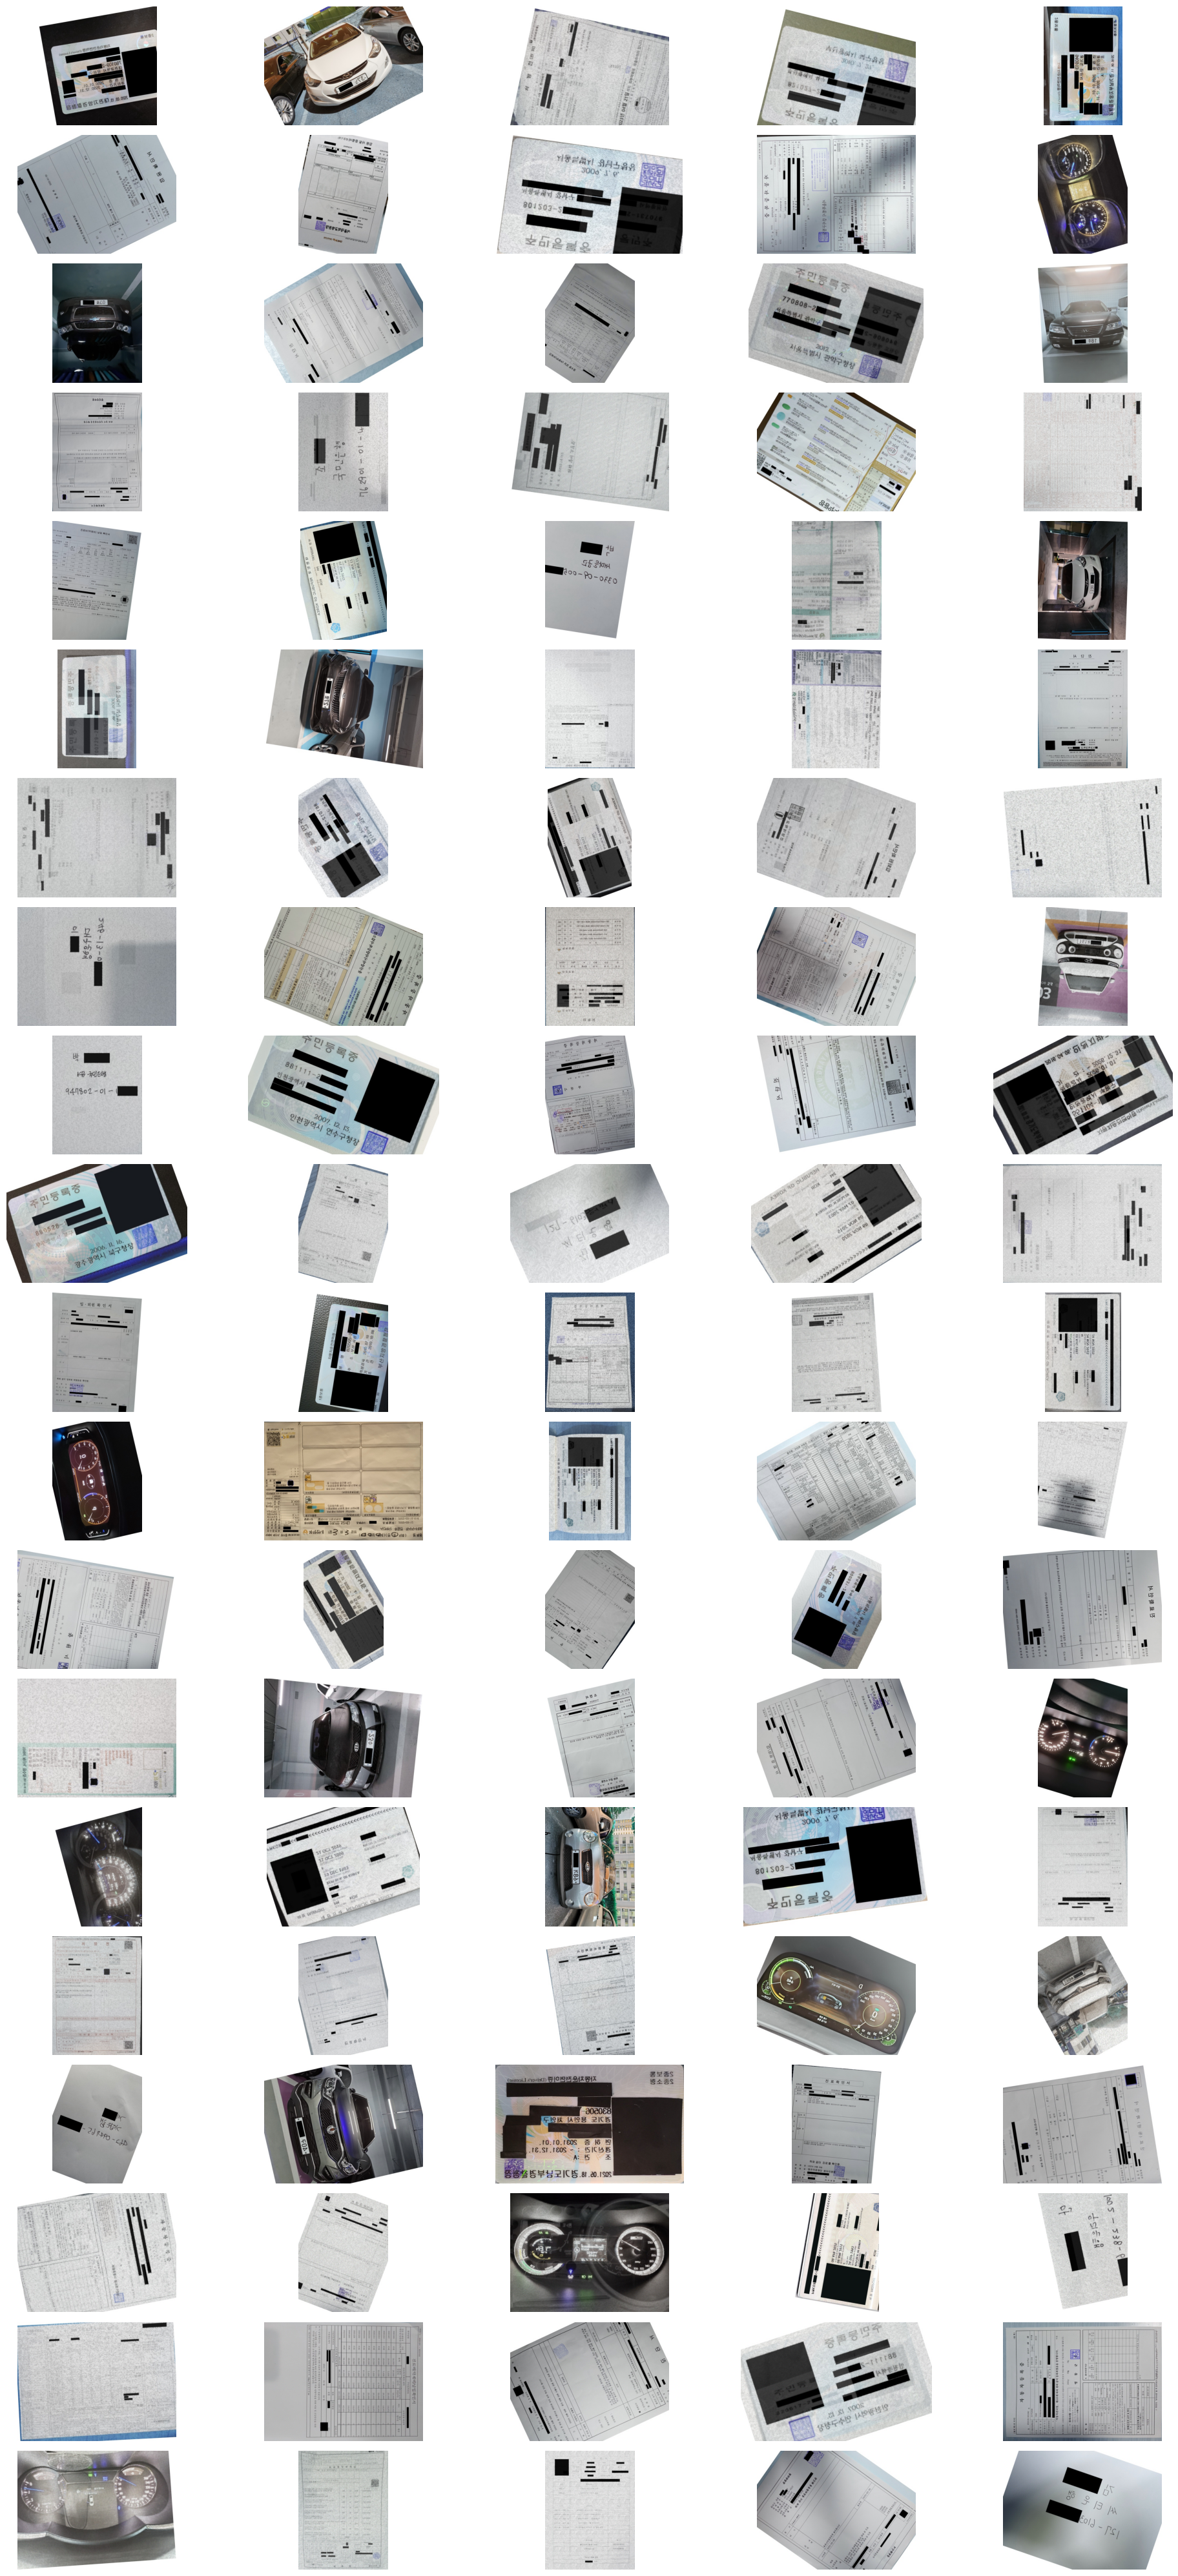

In [ ]:
# 테스트 이미지 폴더 경로
test_folder = '/content/drive/MyDrive/AI Lab/CV 대회/data/test'

# 테스트 폴더에 있는 이미지 파일명 가져오기
test_images = os.listdir(test_folder)

# test_df 데이터프레임 생성
test_df = pd.DataFrame({'ID': test_images})

# 샘플 이미지 100개를 시각화
def plot_sample_images(test_df, num_samples=100, folder=test_folder):
    plt.figure(figsize=(20, 40))  # 100개의 이미지를 20x5 그리드로 배치

    sample_images = test_df.sample(num_samples)

    for i, (index, row) in enumerate(sample_images.iterrows()):
        img_path = os.path.join(folder, row['ID'])
        img = mpimg.imread(img_path)

        plt.subplot(20, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 샘플 이미지 표시
plot_sample_images(test_df)

## b. 테스트 데이터 크기 분석

Mean Width: 517.0850318471338
Mean Height: 518.5563694267516


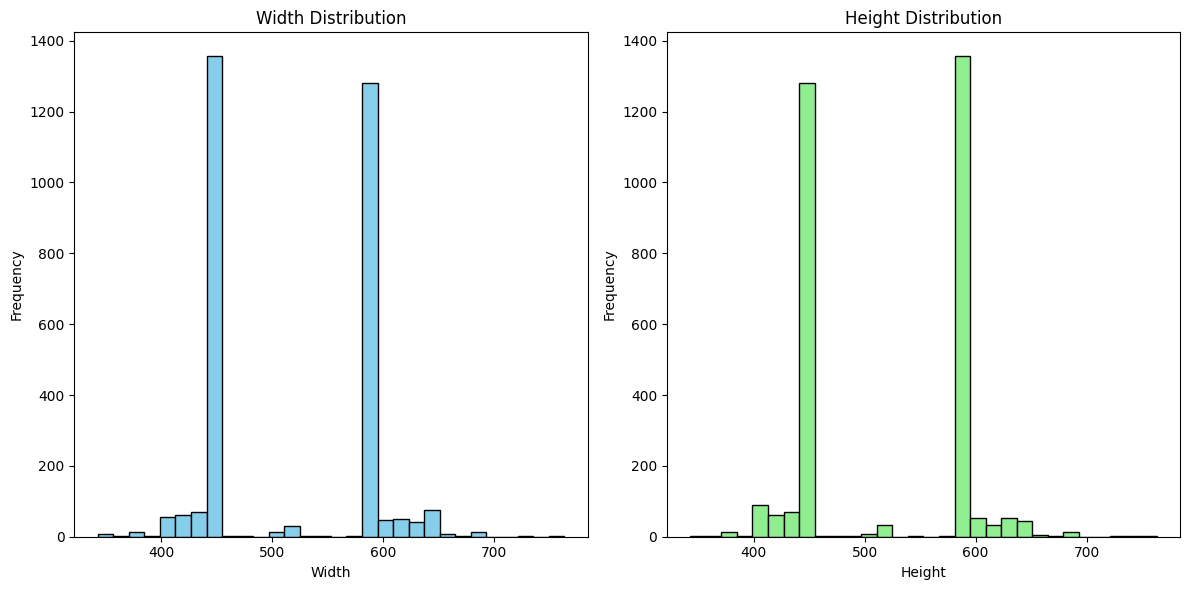

In [ ]:
# 이미지 크기 정보를 저장할 리스트
image_sizes = []

# 각 이미지의 크기를 읽어서 리스트에 저장
for image_name in test_images:
    img_path = os.path.join(test_folder, image_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # (width, height)

# 데이터프레임으로 변환
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# 이미지 크기의 평균 계산
mean_width = image_sizes_df['Width'].mean()
mean_height = image_sizes_df['Height'].mean()

print(f"Mean Width: {mean_width}")
print(f"Mean Height: {mean_height}")

# 이미지 크기 분포 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(image_sizes_df['Width'], bins=30, color='skyblue', edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_sizes_df['Height'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()